https://finance.yahoo.com/quote/SSRM?p=SSRM&.tsrc=fin-srch

https://algotrading101.com/learn/yahoo-finance-api-guide/

https://trading-data-analysis.pro/trading-using-python-simple-moving-average-sma-8713caf0d4ee

https://charticulator.com/app/index.html

https://dash.plotly.com/basic-callbacks

Every time the SMA50 crosses above the SMA200 we know that the market is in an **upward trend**, 
and when the SMA50 crosses below the SMA200 it is a **downward trend**. 

When the SMA50 crosses above the SMA200 it’s known as the “Golden Cross”, and when the SMA50 crosses below the SMA200 it is known as the “Death Cross”. When this event occurs it usually is followed by a strong price movement.

In [1]:
import json
import urllib.request
import yfinance as yf
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [2]:
#define moving average function
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)


In [34]:
# stock = yf.Ticker("VWS.CO")
# stock = yf.Ticker("K")
# stock = yf.Ticker("ACKB.BR") # Ackermans&van Haaren (COnstruction/Engineering)
# stock = yf.Ticker("RUI.PA") # Rubis (Gas)

# stock = yf.Ticker("0P0000FYPU.F")
# stock = yf.Ticker("SSRA.SG")
# stock = yf.Ticker("GSK.L")
stock = yf.Ticker("ACGL")

In [35]:
# print(stock.info)
hist = stock.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-09-14 00:00:00-04:00,2.277778,2.388889,2.277778,2.361111,12915900,0,0.0
1995-09-15 00:00:00-04:00,2.333333,2.388889,2.305556,2.361111,3802500,0,0.0
1995-09-18 00:00:00-04:00,2.333333,2.416667,2.333333,2.361111,1345500,0,0.0
1995-09-19 00:00:00-04:00,2.333333,2.416667,2.333333,2.333333,1305000,0,0.0
1995-09-20 00:00:00-04:00,2.333333,2.416667,2.333333,2.361111,648900,0,0.0
...,...,...,...,...,...,...,...
2022-10-14 00:00:00-04:00,47.980000,48.070000,46.740002,47.000000,1909400,0,0.0
2022-10-17 00:00:00-04:00,47.360001,48.209999,47.080002,48.080002,1736000,0,0.0
2022-10-18 00:00:00-04:00,48.639999,49.180000,48.200001,48.639999,1556700,0,0.0


In [36]:
# API_TOKEN = '63474c54442c02.21685512'
# STOCK = 'AAPL.US'
# STOCK = 'VWS.CO'
# # STOCK = '0P0000FYPU.F'
# STOCK = 'ACKB.BR'
# STOCK = 'GSK.L'
# url = f"https://eodhistoricaldata.com/api/eod/{STOCK}?api_token={API_TOKEN}&order=d&fmt=json"

# response = urllib.request.urlopen(url)

# hist = json.loads(response.read())

In [37]:
hist = pd.DataFrame(hist)
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-09-14 00:00:00-04:00,2.277778,2.388889,2.277778,2.361111,12915900,0,0.0
1995-09-15 00:00:00-04:00,2.333333,2.388889,2.305556,2.361111,3802500,0,0.0
1995-09-18 00:00:00-04:00,2.333333,2.416667,2.333333,2.361111,1345500,0,0.0
1995-09-19 00:00:00-04:00,2.333333,2.416667,2.333333,2.333333,1305000,0,0.0
1995-09-20 00:00:00-04:00,2.333333,2.416667,2.333333,2.361111,648900,0,0.0


In [38]:
# cols = ['Open', 'high', 'low', 'Close', 'adjusted_close', 'volume']
# hist.columns = cols
# hist.head()

In [39]:
print(min(hist.reset_index().Date))
print(max(hist.reset_index().Date))

1995-09-14 00:00:00-04:00
2022-10-20 00:00:00-04:00


In [40]:
end_date = max(hist.reset_index().Date)
start_date = end_date - pd.Timedelta(days=500)
# start_date = min(hist.reset_index().Date)
print(start_date)
print(end_date)

2021-06-07 00:00:00-04:00
2022-10-20 00:00:00-04:00


In [41]:
hist2 = hist.copy().reset_index()
hist2 = hist2[hist2.Date >= start_date]
hist2 = hist2.set_index('Date')
print(len(hist2))
hist2.head()

348


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-07 00:00:00-04:00,39.169998,39.810001,39.169998,39.709999,2555400,0,0.0
2021-06-08 00:00:00-04:00,39.680000,39.720001,39.060001,39.570000,1435400,0,0.0
2021-06-09 00:00:00-04:00,39.389999,39.509998,39.009998,39.060001,2309700,0,0.0
2021-06-10 00:00:00-04:00,39.400002,39.549999,39.000000,39.009998,1530500,0,0.0
2021-06-11 00:00:00-04:00,39.119999,39.299999,38.930000,39.290001,1954000,0,0.0


In [42]:
# tmp = pd.DataFrame(hist2)
# df = tmp['Close'].to_frame()

df = hist2.copy()
df['sma50'] = df['Close'].rolling(50, min_periods=50).mean()
df['sma200'] = df['Close'].rolling(200, min_periods=200).mean()
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma50,sma200
Date,,,,,,,,,
2022-03-21 00:00:00-04:00,46.299999,47.189999,46.200001,47.150002,2119500,0,0.0,46.4344,42.25405
2022-03-22 00:00:00-04:00,47.500000,47.770000,46.790001,47.110001,1598200,0,0.0,46.4752,42.29105
2022-03-23 00:00:00-04:00,46.950001,47.009998,46.590000,46.599998,1630600,0,0.0,46.4868,42.32620
2022-03-24 00:00:00-04:00,46.799999,47.180000,46.639999,47.130001,2235100,0,0.0,46.5020,42.36655
2022-03-25 00:00:00-04:00,47.250000,47.759998,47.250000,47.669998,2332800,0,0.0,46.5260,42.40985


In [43]:
df.loc[df["sma50"] > df["sma200"], "sma50gtsma200"] = True
df["sma50gtsma200"].fillna(False, inplace=True)
df.loc[df["sma50"] < df["sma200"], "sma50ltsma200"] = True
df["sma50ltsma200"].fillna(False, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma50,sma200,sma50gtsma200,sma50ltsma200
Date,,,,,,,,,,,
2022-03-21 00:00:00-04:00,46.299999,47.189999,46.200001,47.150002,2119500,0,0.0,46.4344,42.25405,True,False
2022-03-22 00:00:00-04:00,47.500000,47.770000,46.790001,47.110001,1598200,0,0.0,46.4752,42.29105,True,False
2022-03-23 00:00:00-04:00,46.950001,47.009998,46.590000,46.599998,1630600,0,0.0,46.4868,42.32620,True,False
2022-03-24 00:00:00-04:00,46.799999,47.180000,46.639999,47.130001,2235100,0,0.0,46.5020,42.36655,True,False
2022-03-25 00:00:00-04:00,47.250000,47.759998,47.250000,47.669998,2332800,0,0.0,46.5260,42.40985,True,False


In [44]:
df["sma50gtsma200co"] = df.sma50gtsma200.ne(df.sma50gtsma200.shift())
df.loc[df["sma50gtsma200"] == False, "sma50gtsma200co"] = False
df["sma50ltsma200co"] = df.sma50ltsma200.ne(df.sma50ltsma200.shift())
df.loc[df["sma50ltsma200"] == False, "sma50ltsma200co"] = False
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
Date,,,,,,,,,,,,,
2022-03-21 00:00:00-04:00,46.299999,47.189999,46.200001,47.150002,2119500,0,0.0,46.4344,42.254050,True,False,True,False
2022-03-22 00:00:00-04:00,47.500000,47.770000,46.790001,47.110001,1598200,0,0.0,46.4752,42.291050,True,False,False,False
2022-03-23 00:00:00-04:00,46.950001,47.009998,46.590000,46.599998,1630600,0,0.0,46.4868,42.326200,True,False,False,False
2022-03-24 00:00:00-04:00,46.799999,47.180000,46.639999,47.130001,2235100,0,0.0,46.5020,42.366550,True,False,False,False
2022-03-25 00:00:00-04:00,47.250000,47.759998,47.250000,47.669998,2332800,0,0.0,46.5260,42.409850,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 00:00:00-04:00,47.980000,48.070000,46.740002,47.000000,1909400,0,0.0,46.1150,46.033350,True,False,False,False
2022-10-17 00:00:00-04:00,47.360001,48.209999,47.080002,48.080002,1736000,0,0.0,46.2004,46.052100,True,False,False,False
2022-10-18 00:00:00-04:00,48.639999,49.180000,48.200001,48.639999,1556700,0,0.0,46.2902,46.073050,True,False,False,False


In [45]:
buysignals = df[df["sma50gtsma200co"] == True]
buysignals

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
Date,,,,,,,,,,,,,
2022-03-21 00:00:00-04:00,46.299999,47.189999,46.200001,47.150002,2119500,0,0.0,46.4344,42.25405,True,False,True,False
2022-10-13 00:00:00-04:00,45.049999,47.820000,44.619999,47.529999,3025800,0,0.0,46.0460,46.02135,True,False,True,False


In [46]:
sellsignals = df[df["sma50ltsma200co"] == True]
sellsignals

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
Date,,,,,,,,,,,,,
2022-07-25 00:00:00-04:00,44.009998,44.48,43.709999,44.080002,1665200,0,0.0,45.077,45.10845,False,True,False,True


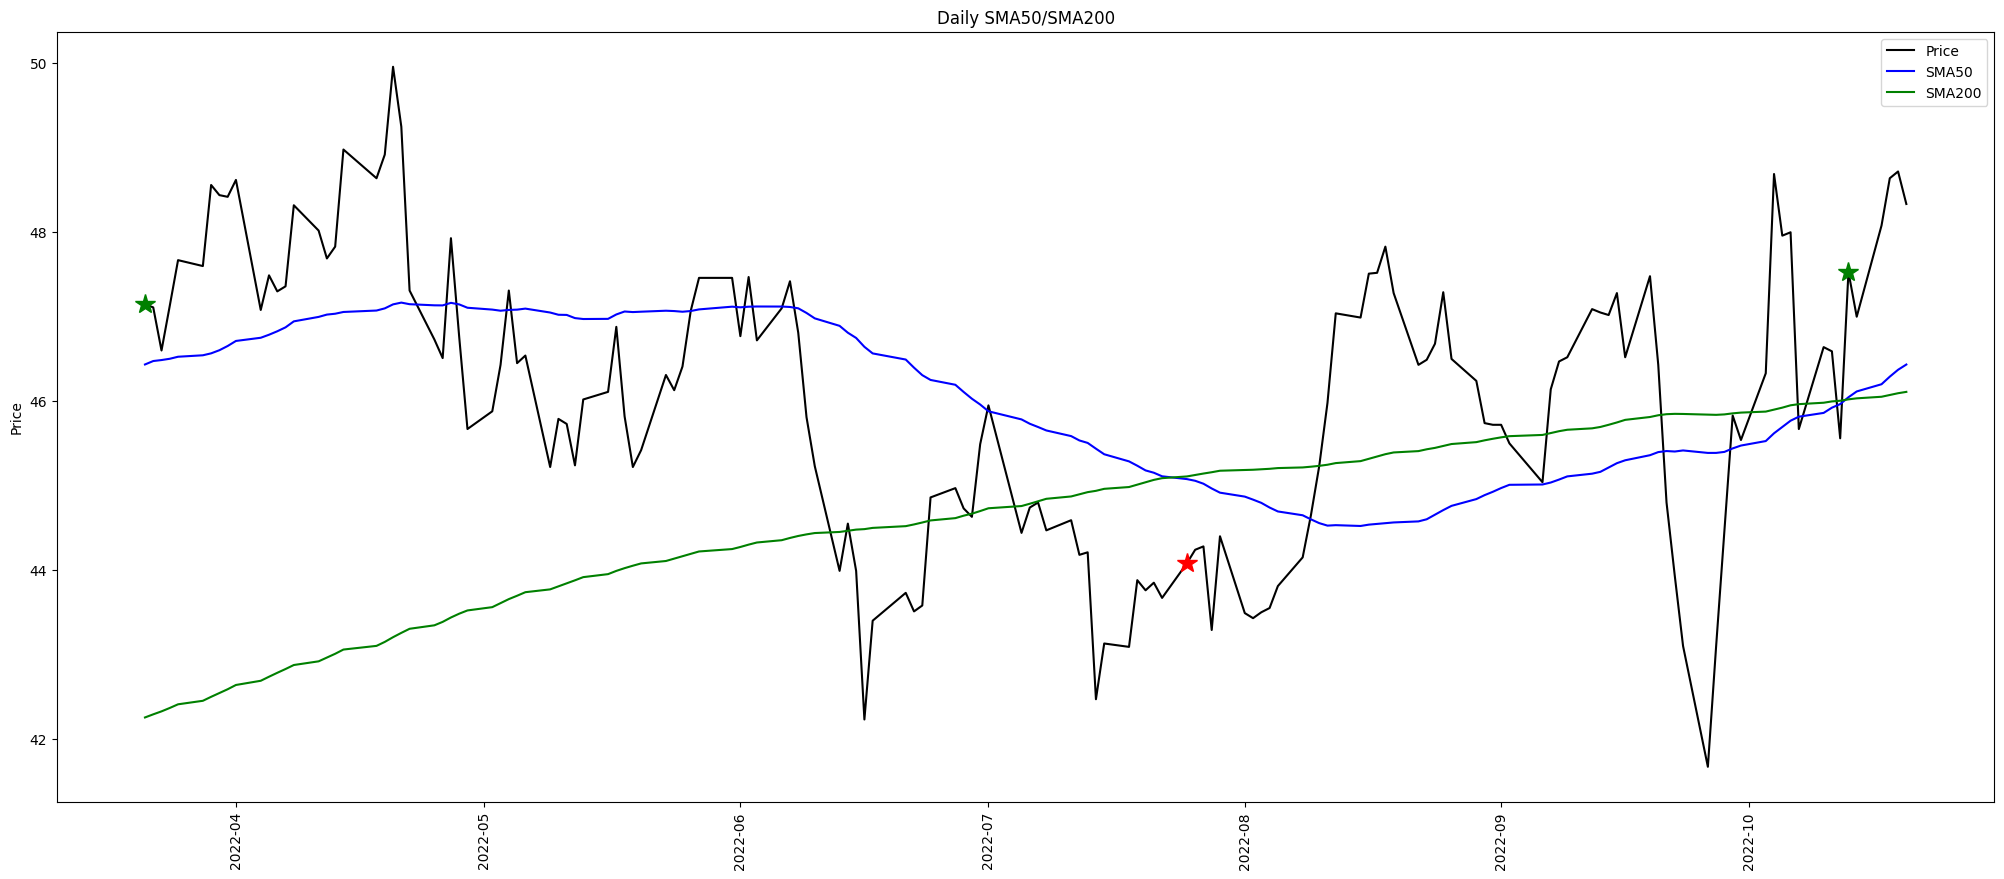

In [47]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
# reliance[['Close', SMA50', 'SMA200']].plot(label='RELIANCE', figsize=(16, 8))
# df[['sma50', 'sma200']].plot(label='', figsize=(16, 8))

plt.figure(figsize=(25,10))
plt.plot(df["Close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Daily SMA50/SMA200")
plt.legend()

for idx in buysignals.index.tolist():
  plt.plot(
      idx,
      df.loc[idx]["Close"],
      "g*",
      markersize=15
  )
for idx in sellsignals.index.tolist():
  plt.plot(
      idx,
      df.loc[idx]["Close"],
      "r*",
      markersize=15
  )

plt.show()